## MULTIPLE LINEAR REGRESSION

In [2]:
# Perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [318]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt 

In [320]:
df=pd.read_csv('ToyotaCorolla_-_MLR[1].csv')

In [322]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [324]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [326]:
target=df[['Price']]

In [328]:
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [330]:
features=df.drop(columns='Price')
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


#### 1.Exploratory Data Analysis

In [333]:
df.size

15796

In [335]:
df.shape

(1436, 11)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [339]:
## 1.1 Data Cleaning and Preprocessing

In [341]:
# to check missing values

In [343]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [345]:
# there is no missing values ,so we can skip the deleting missing value process

In [347]:
# checking duplicates

In [349]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [351]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [353]:
# removing duplicates
# Keeps the first occurrence of duplicate and drops subsequent duplicate.

In [355]:
df.drop_duplicates(keep='first')

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [357]:
# Modifies the original DataFrame in place, so no new DataFrame is created.
# Resets the index of the DataFrame after dropping duplicates, giving a continuous index.

In [359]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [361]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

In [363]:
cat_col=[i for i in df.columns if df[i].dtype=='O']
cat_col

['Fuel_Type']

In [365]:
# detect outliers

In [367]:
Q1P= df['Price'].quantile(0.25)
Q3P=df['Price'].quantile(0.75)
IQRP=Q3P-Q1P
print(Q1P,Q3P,IQRP)

8450.0 11950.0 3500.0


In [369]:
lower_extremeP=Q1P-1.5*IQRP
upper_extremeP=Q3P+1.5*IQRP
print(lower_extremeP,upper_extremeP)

3200.0 17200.0


In [371]:
df_P_outliers= df[(df['Price']<lower_extremeP) | (df['Price']>upper_extremeP)]
df_P_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
181,21125,2,225,Petrol,97,0,1400,5,4,5,1110
182,21500,2,15,Petrol,110,0,1600,5,4,5,1130
183,17795,1,1,Petrol,98,0,1400,4,4,5,1100
184,18245,1,1,Petrol,110,0,1600,5,4,5,1075


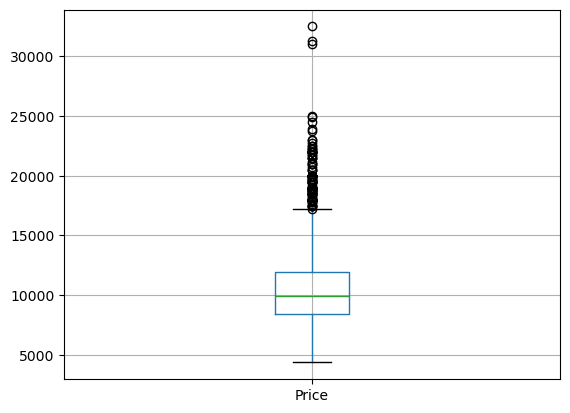

In [373]:
df.boxplot('Price')
plt.show()

In [374]:
df_P_no_outliers=df[(df['Price']>=lower_extremeP) & (df['Price']<=upper_extremeP)]
df_P_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


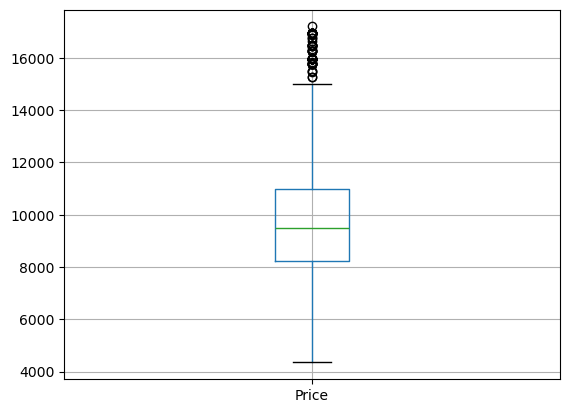

In [375]:
df_P_no_outliers.boxplot('Price')
plt.show()

In [377]:
Q1A= df['Age_08_04'].quantile(0.25)
Q3A=df['Age_08_04'].quantile(0.75)
IQRA=Q3A-Q1A
print(Q1A,Q3A,IQRA)

44.0 70.0 26.0


In [379]:
lower_extremeA=Q1A-1.5*IQRA
upper_extremeA=Q3A+1.5*IQRA
print(lower_extremeA,upper_extremeA)

5.0 109.0


In [381]:
df_A_outliers= df[(df['Age_08_04']<lower_extremeA) | (df['Age_08_04']>upper_extremeA)]
df_A_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,32500,4,1,Diesel,116,0,2000,5,4,5,1480
110,31000,4,4000,Diesel,116,0,2000,5,4,5,1480
111,31275,4,1500,Diesel,116,0,2000,5,4,5,1480
181,21125,2,225,Petrol,97,0,1400,5,4,5,1110
182,21500,2,15,Petrol,110,0,1600,5,4,5,1130
183,17795,1,1,Petrol,98,0,1400,4,4,5,1100
184,18245,1,1,Petrol,110,0,1600,5,4,5,1075


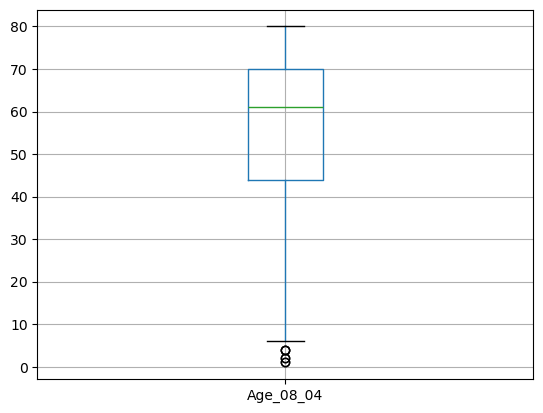

In [384]:
df.boxplot('Age_08_04')
plt.show()

In [386]:
df_A_no_outliers=df[(df['Age_08_04']>=lower_extremeA) & (df['Age_08_04']<=upper_extremeA)]
df_A_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


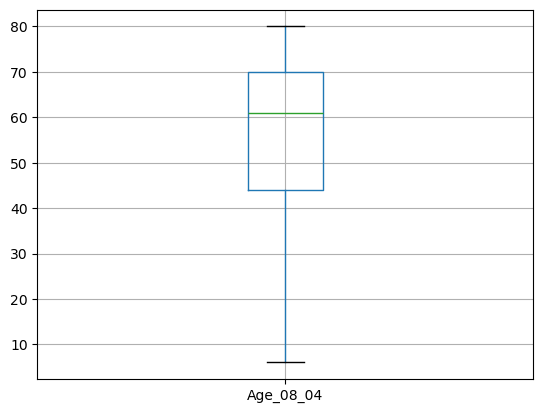

In [387]:
df_A_no_outliers.boxplot('Age_08_04')
plt.show()

In [388]:
Q1K= df['KM'].quantile(0.25)
Q3K=df['KM'].quantile(0.75)
IQRK=Q3K-Q1K
print(Q1K,Q3K,IQRK)

43000.0 87041.5 44041.5


In [390]:
lower_extremeK=Q1K-1.5*IQRK
upper_extremeK=Q3K+1.5*IQRK
print(lower_extremeK,upper_extremeK)

-23062.25 153103.75


In [392]:
df_K_outliers=df[(df['KM']<lower_extremeK) | (df['KM']>upper_extremeK)]
df_K_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
185,6950,43,243000,Diesel,69,0,1900,3,4,5,1110
186,9500,38,180638,Diesel,90,0,2000,4,4,5,1160
187,11950,40,179860,Diesel,90,0,2000,5,4,5,1205
188,7750,43,178858,CNG,110,0,1600,3,4,5,1084
189,11950,40,161000,Diesel,69,0,1900,3,4,5,1105
190,4350,44,158320,Diesel,69,0,1800,5,4,5,1110
377,6500,53,216000,Diesel,69,0,1900,3,4,5,1110
378,6400,51,198167,Diesel,69,0,1900,4,4,5,1095
379,7000,53,176000,Diesel,69,0,1900,3,4,5,1105
380,7750,54,174139,Diesel,72,0,2000,4,4,5,1100


In [395]:
df_K_no_outliers=df[(df['KM']>=lower_extremeK) & (df['KM']<=upper_extremeK)]
df_K_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


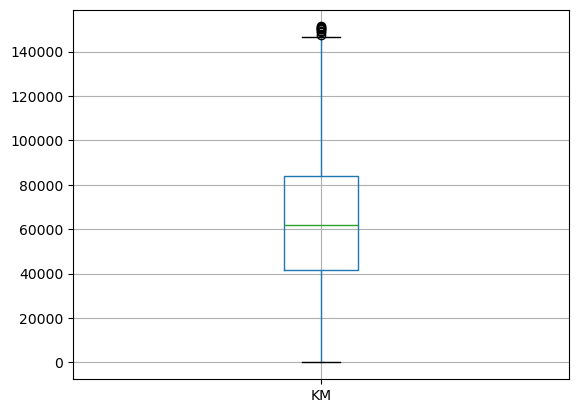

In [397]:
df_K_no_outliers.boxplot('KM')
plt.show()

In [399]:
Q1H= df['HP'].quantile(0.25)
Q3H=df['HP'].quantile(0.75)
IQRH=Q3H-Q1H
print(Q1H,Q3H,IQRH)

90.0 110.0 20.0


In [401]:
lower_extremeH=Q1H-1.5*IQRH
upper_extremeH=Q3H+1.5*IQRH
print(lower_extremeH,upper_extremeH)

60.0 140.0


In [402]:
df_H_outliers=df[(df['HP']<lower_extremeH) | (df['HP']>upper_extremeH)]
df_H_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
13,21500,31,23000,Petrol,192,0,1800,3,4,6,1185
14,22500,32,34131,Petrol,192,0,1800,3,4,6,1185
15,22000,28,18739,Petrol,192,0,1800,3,4,6,1185
16,22750,30,34000,Petrol,192,0,1800,3,4,5,1185
49,21950,31,64982,Petrol,192,0,1800,5,4,6,1195
53,21950,27,49866,Petrol,192,0,1800,5,4,5,1195


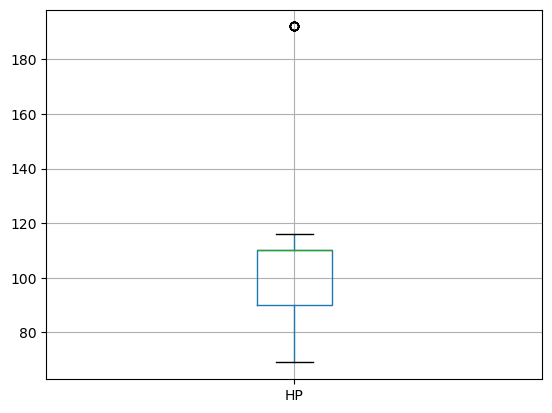

In [405]:
df.boxplot('HP')
plt.show()

In [408]:
df_H_no_outliers=df[(df['HP']>=lower_extremeH) & (df['HP']<=upper_extremeH)]
df_H_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


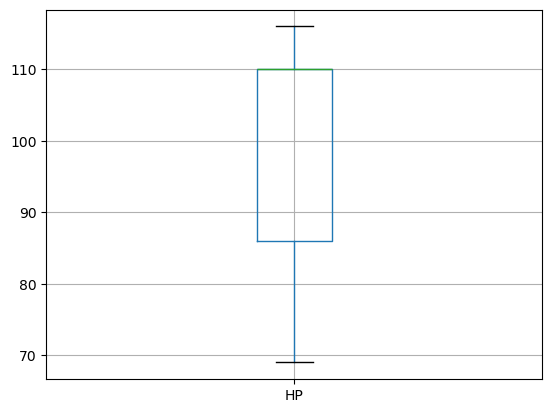

In [409]:
df_H_no_outliers.boxplot('HP')
plt.show()

In [410]:
Q1Au= df['Automatic'].quantile(0.25)
Q3Au=df['Automatic'].quantile(0.75)
IQRAu=Q3Au-Q1Au
print(Q1Au,Q3Au,IQRAu)

0.0 0.0 0.0


In [412]:
lower_extremeAu=Q1Au-1.5*IQRAu
upper_extremeAu=Q3Au+1.5*IQRAu
print(lower_extremeAu,upper_extremeAu)

0.0 0.0


In [414]:
df_Au_outliers=df[(df['Automatic']<lower_extremeAu) | (df['Automatic']>upper_extremeAu)]
df_Au_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
21,16950,29,43905,Petrol,110,1,1600,3,4,5,1170
52,20500,26,56000,Petrol,110,1,1600,5,4,5,1180
54,15500,25,49163,Petrol,110,1,1600,5,4,5,1165
58,18950,23,39704,Petrol,110,1,1600,5,4,5,1180
80,18950,25,20019,Petrol,110,1,16000,5,4,5,1180
...,...,...,...,...,...,...,...,...,...,...,...
1420,8500,78,36000,Petrol,86,1,1300,3,4,5,1045
1422,7950,80,35821,Petrol,86,1,1300,3,4,5,1015
1425,9950,78,30964,Petrol,110,1,1600,3,4,4,1080
1426,8950,71,29000,Petrol,86,1,1300,3,4,5,1045


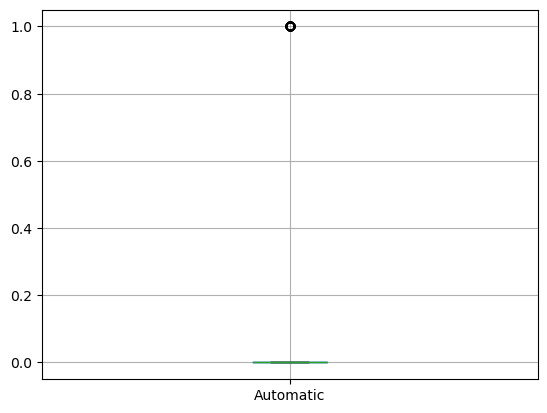

In [417]:
df.boxplot('Automatic')
plt.show()

In [419]:
df_Au_no_outliers=df[(df['Automatic']>=lower_extremeAu) & (df['Automatic']<=upper_extremeAu)]
df_Au_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


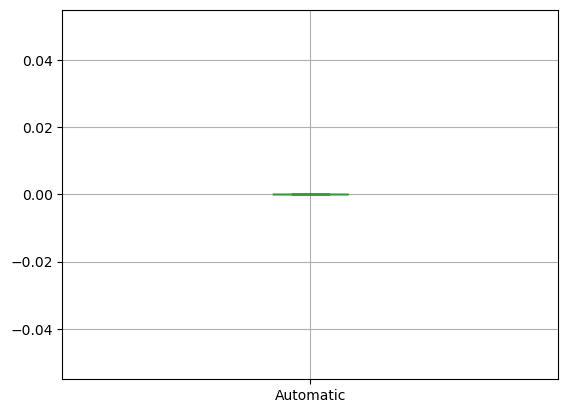

In [421]:
df_Au_no_outliers.boxplot('Automatic')
plt.show()

In [422]:
Q1c= df['cc'].quantile(0.25)
Q3c=df['cc'].quantile(0.75)
IQRc=Q3c-Q1c
print(Q1c,Q3c,IQRc)

1400.0 1600.0 200.0


In [423]:
lower_extremec=Q1c-1.5*IQRc
upper_extremec=Q3c+1.5*IQRc
print(lower_extremec,upper_extremec)

1100.0 1900.0


In [424]:
df_c_outliers=df[(df['cc']<lower_extremec) | (df['cc']>upper_extremec)]
df_c_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1194,8750,74,89800,Diesel,72,0,2000,3,4,5,1115
1201,6950,73,88186,Diesel,72,0,2000,3,4,5,1115
1215,8500,70,85864,Diesel,72,0,2000,5,4,5,1135
1319,9400,69,67092,Diesel,72,0,2000,3,4,5,1115


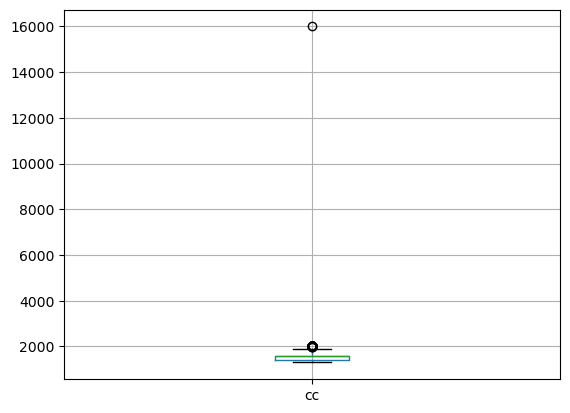

In [425]:
df.boxplot('cc')
plt.show()

In [426]:
df_c_no_outliers=df[(df['cc']>=lower_extremec) & (df['cc']<=upper_extremec)]
df_c_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


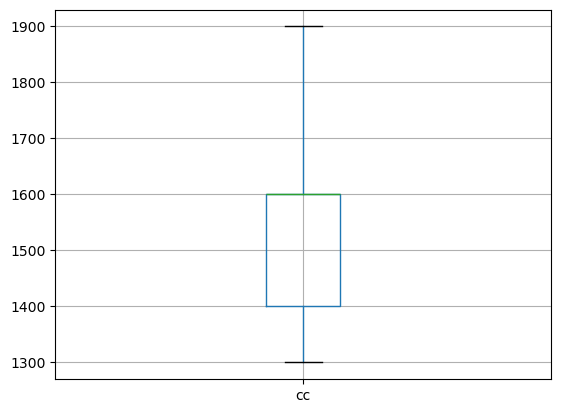

In [427]:
df_c_no_outliers.boxplot('cc')
plt.show()

In [428]:
Q1D= df['Doors'].quantile(0.25)
Q3D=df['Doors'].quantile(0.75)
IQRD=Q3D-Q1D
print(Q1D,Q3D,IQRD)

3.0 5.0 2.0


In [430]:
lower_extremeD=Q1D-1.5*IQRD
upper_extremeD=Q3D+1.5*IQRD
print(lower_extremeD,upper_extremeD)

0.0 8.0


In [432]:
df_D_outliers=df[(df['Doors']<lower_extremeD) | (df['Doors']>upper_extremeD)]
df_D_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [437]:
# no outliers lies in Doors

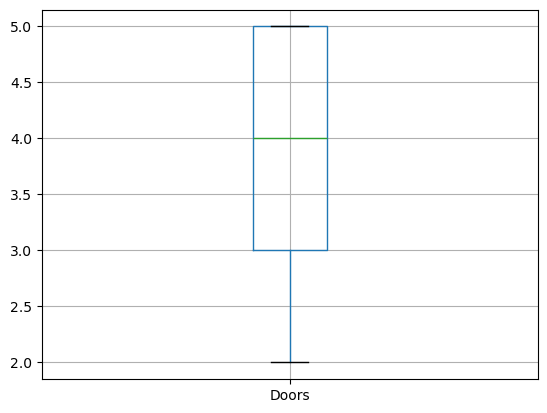

In [438]:
df.boxplot('Doors')
plt.show()

In [441]:
df_D_no_outliers=df[(df['Doors']>=lower_extremeD) & (df['Doors']<=upper_extremeD)]
df_D_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


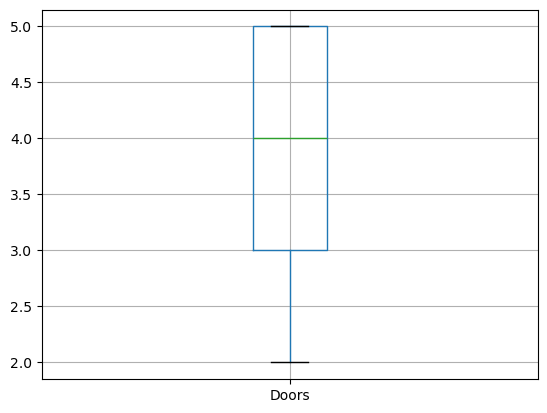

In [444]:
df_D_no_outliers.boxplot('Doors')
plt.show()

In [447]:
Q1Cy= df['Cylinders'].quantile(0.25)
Q3Cy=df['Cylinders'].quantile(0.75)
IQRCy=Q3Cy-Q1Cy
print(Q1Cy,Q3Cy,IQRCy)

4.0 4.0 0.0


In [448]:
lower_extremeCy=Q1Cy-1.5*IQRCy
upper_extremeCy=Q3Cy+1.5*IQRCy
print(lower_extremeCy,upper_extremeCy)

4.0 4.0


In [449]:
df_Cy_outliers=df[(df['Cylinders']<lower_extremeCy) | (df['Cylinders']>upper_extremeCy)]
df_Cy_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [451]:
# no outliers in Cylinders

In [453]:
df_Cy_no_outliers=df[(df['Cylinders']>=lower_extremeCy) & (df['Cylinders']<=upper_extremeCy)]
df_Cy_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


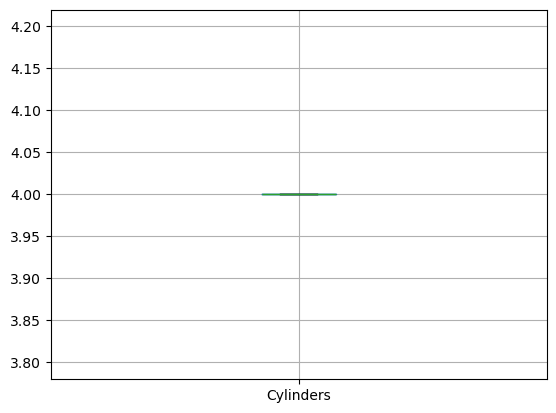

In [454]:
df_Cy_no_outliers.boxplot('Cylinders')
plt.show()

In [456]:
Q1G= df['Gears'].quantile(0.25)
Q3G=df['Gears'].quantile(0.75)
IQRG=Q3G-Q1G
print(Q1G,Q3G,IQRG)

5.0 5.0 0.0


In [457]:
lower_extremeG=Q1G-1.5*IQRG
upper_extremeG=Q3G+1.5*IQRG
print(lower_extremeG,upper_extremeG)

5.0 5.0


In [458]:
df_G_outliers=df[(df['Gears']<lower_extremeG) | (df['Gears']>upper_extremeG)]
df_G_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
13,21500,31,23000,Petrol,192,0,1800,3,4,6,1185
14,22500,32,34131,Petrol,192,0,1800,3,4,6,1185
15,22000,28,18739,Petrol,192,0,1800,3,4,6,1185
49,21950,31,64982,Petrol,192,0,1800,5,4,6,1195
329,11000,41,33000,Petrol,110,1,1600,5,4,6,1075
443,11750,48,75045,Petrol,110,0,1600,3,4,6,1055
460,11950,49,69659,Petrol,86,0,1300,3,4,6,1025


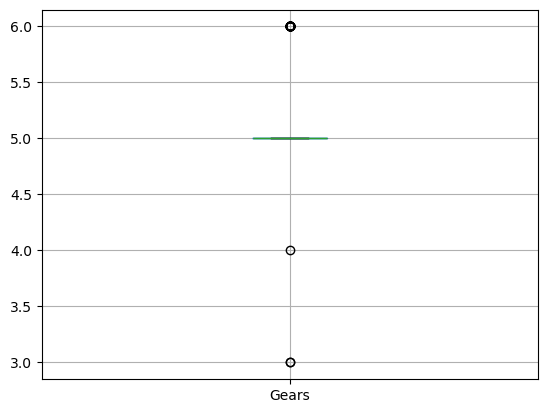

In [460]:
df.boxplot('Gears')
plt.show()

In [464]:
df_G_no_outliers=df[(df['Gears']>=lower_extremeG) & (df['Gears']<=upper_extremeG)]
df_G_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


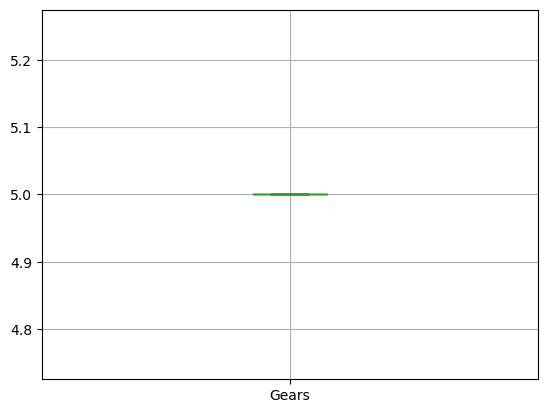

In [466]:
df_G_no_outliers.boxplot('Gears')
plt.show()

In [468]:
Q1W= df['Weight'].quantile(0.25)
Q3W=df['Weight'].quantile(0.75)
IQRW=Q3W-Q1W
print(Q1W,Q3W,IQRW)

1040.0 1085.0 45.0


In [470]:
lower_extremeW=Q1W-1.5*IQRW
upper_extremeW=Q3W+1.5*IQRW
print(lower_extremeW,upper_extremeW)

972.5 1152.5


In [474]:
df_W_outliers=df[(df['Weight']<lower_extremeW) | (df['Weight']>upper_extremeW)]
df_W_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
600,7500,50,1,Diesel,90,0,2000,3,4,5,1260
653,6950,65,114383,Diesel,90,0,2000,3,4,5,1260
767,10950,59,78750,Diesel,90,0,1975,5,4,5,1155
959,9390,66,50806,Petrol,86,0,1300,3,4,5,1480


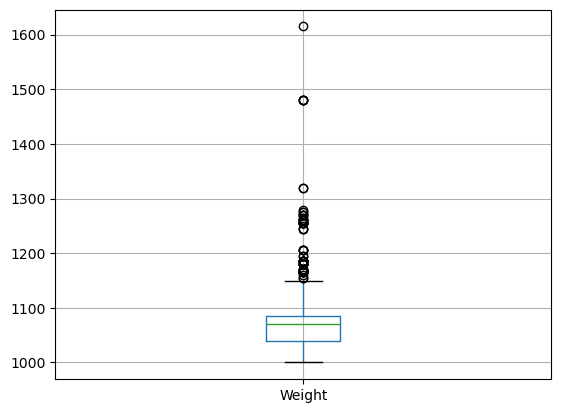

In [476]:
df.boxplot('Weight')
plt.show()

In [477]:
df_W_no_outliers=df[(df['Weight']>=lower_extremeW) & (df['Weight']<=upper_extremeW)]
df_W_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
17,17950,24,21716,Petrol,110,0,1600,3,4,5,1105
18,16750,24,25563,Petrol,110,0,1600,3,4,5,1065
19,16950,30,64359,Petrol,110,0,1600,3,4,5,1105
20,15950,30,67660,Petrol,110,0,1600,3,4,5,1105
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


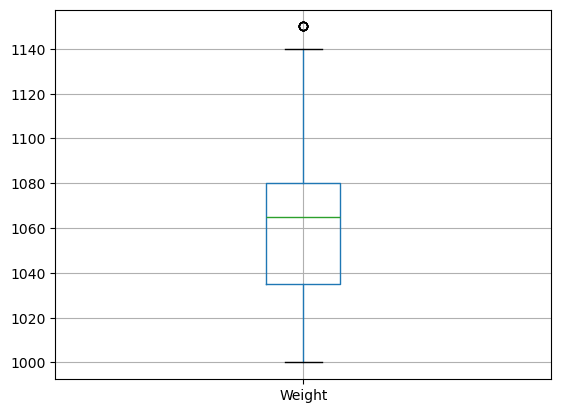

In [479]:
df_W_no_outliers.boxplot('Weight')
plt.show()

In [480]:
# Statistical Summary

In [483]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


In [485]:
df[num_col].median()

Price         9900.0
Age_08_04       61.0
KM           63451.0
HP             110.0
Automatic        0.0
cc            1600.0
Doors            4.0
Cylinders        4.0
Gears            5.0
Weight        1070.0
dtype: float64

In [486]:
# Data Visualization

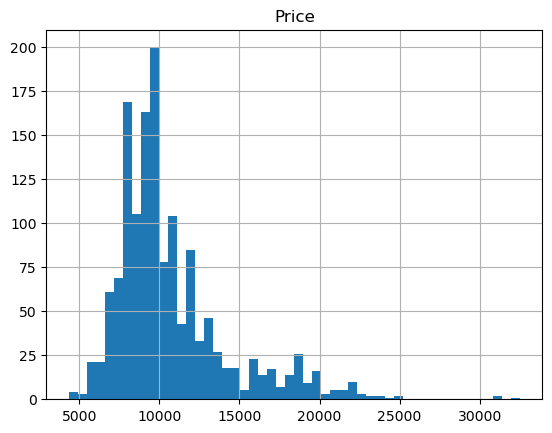

In [488]:
df.hist('Price', bins=50)
plt.show()

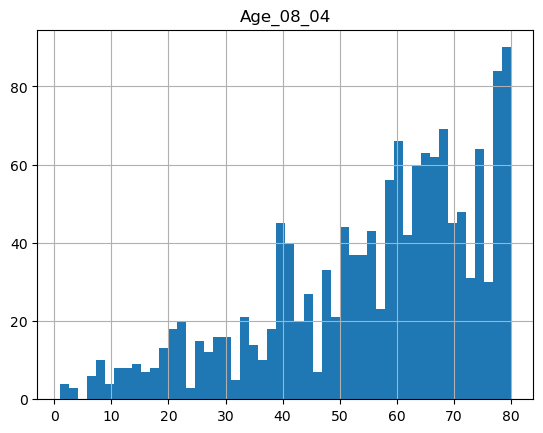

In [490]:
df.hist('Age_08_04', bins=50)
plt.show()

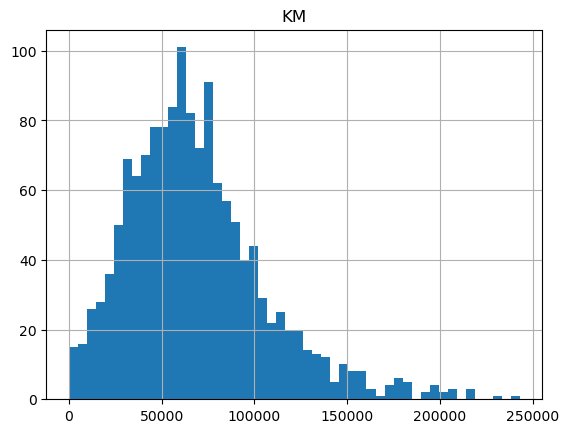

In [492]:
df.hist('KM', bins=50)
plt.show()

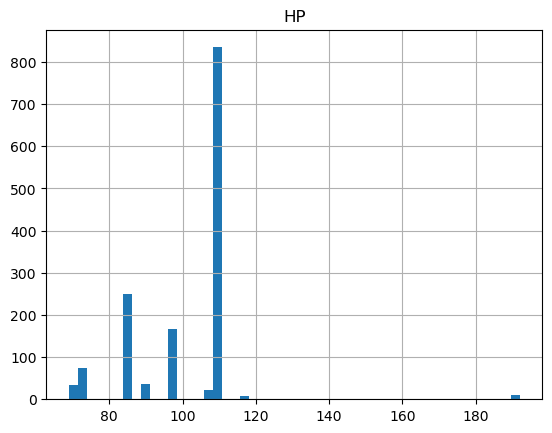

In [494]:
df.hist('HP', bins=50)
plt.show()

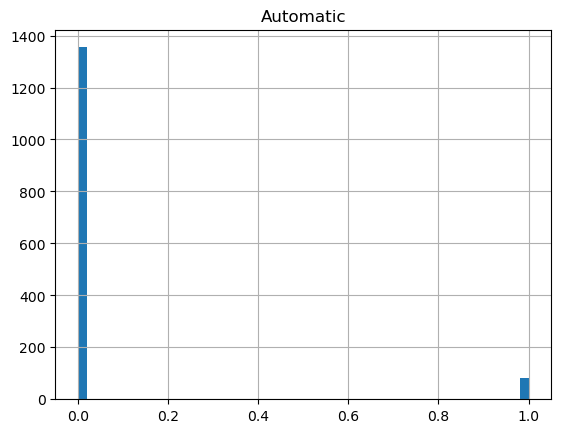

In [496]:
df.hist('Automatic', bins=50)
plt.show()

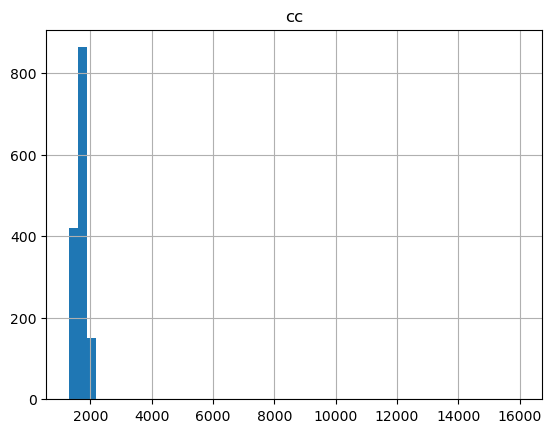

In [498]:
df.hist('cc', bins=50)
plt.show()

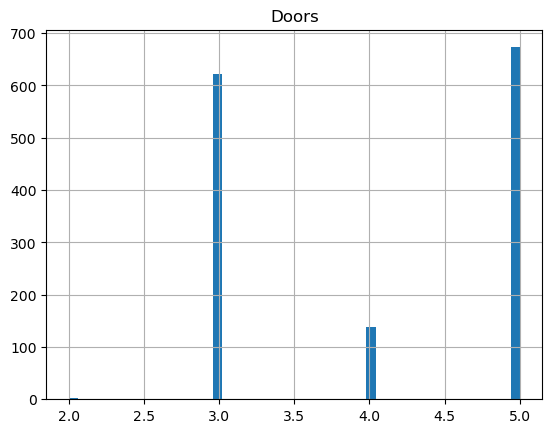

In [501]:
df.hist('Doors', bins=50)
plt.show()

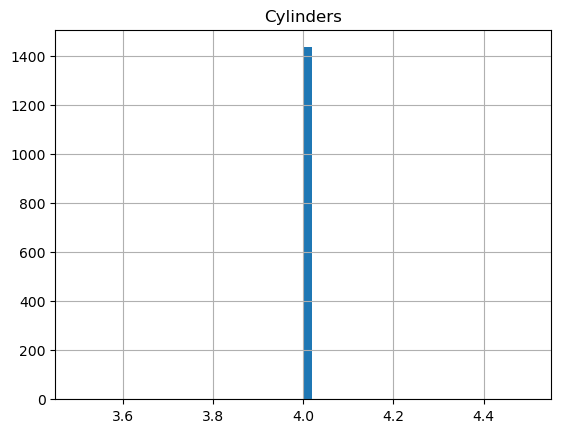

In [502]:
df.hist('Cylinders', bins=50)
plt.show()

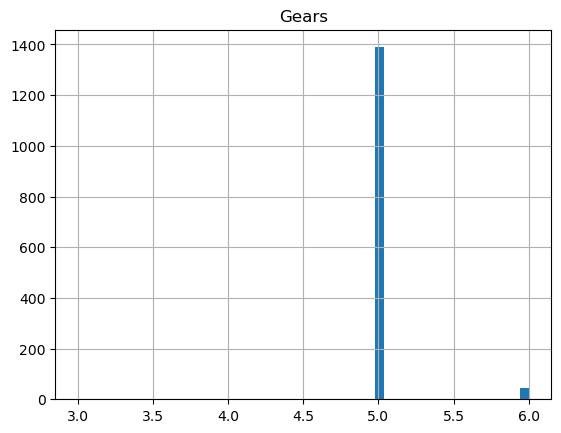

In [503]:
df.hist('Gears', bins=50)
plt.show()

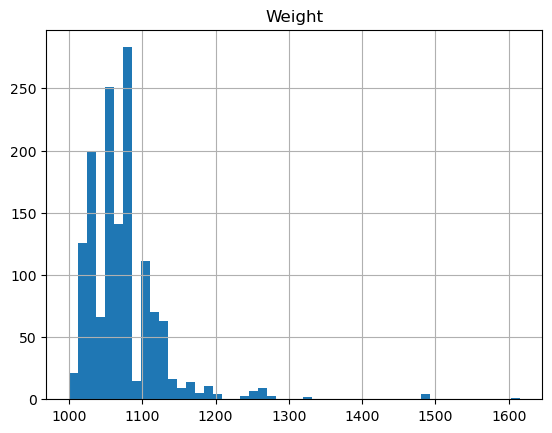

In [505]:
df.hist('Weight', bins=50)
plt.show()

In [506]:
# (or)histogram 

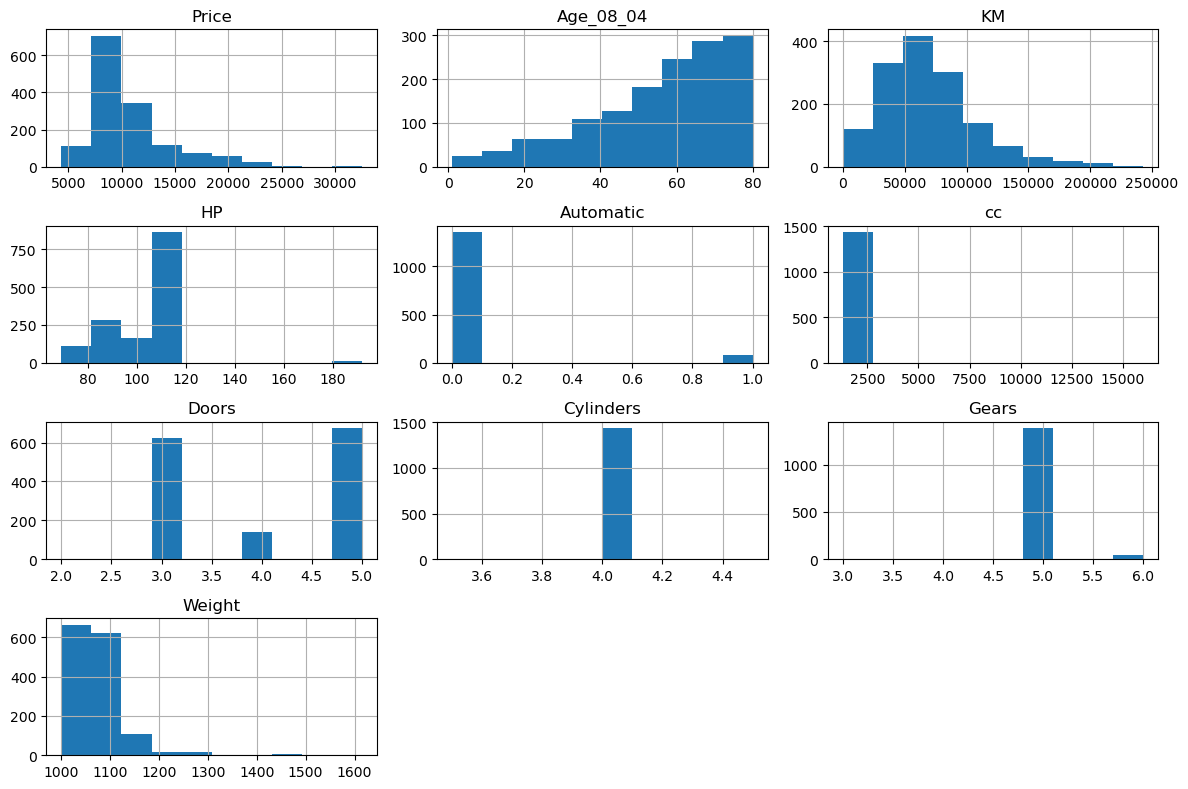

In [507]:
df[num_col].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

In [509]:
corr=df[num_col].corr()
corr

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


In [510]:
# Reasons for NaN in Correlation Matrix:
# 1. No variation: With only one value, there's no variation to calculate correlation.
# 2. Constant variable: A constant variable doesn't contribute to correlation analysis.

In [511]:
range(len(corr.columns))

range(0, 10)

In [513]:
for i in range(len(corr.columns)):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [514]:
# correlation heatmap

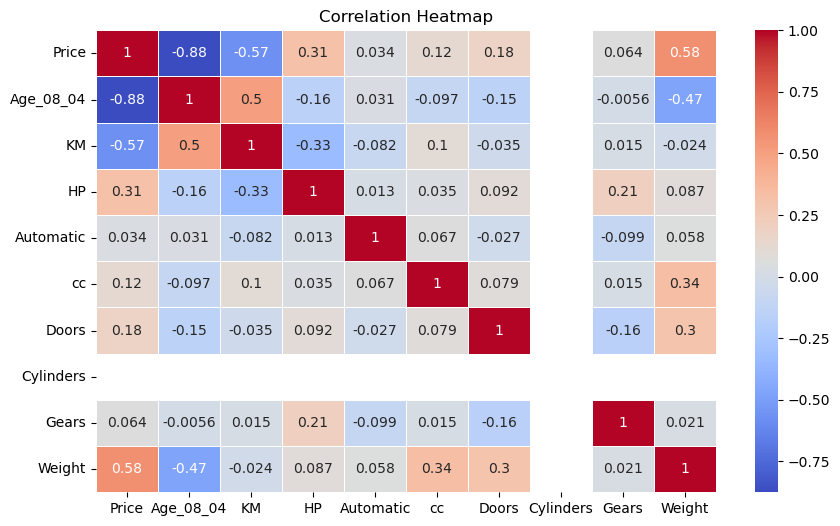

In [515]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_col].corr(),annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [518]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
1349         70  61000    Petrol  110          0  1600      4          4   
857          60  64914    Petrol  110          0  1600      5          4   
902          63  59000    Petrol   86          0  1300      5          4   
372          40  17051    Petrol   97          0  1400      5          4   
1377         73  56307    Petrol  110          0  1600      3          4   
...         ...    ...       ...  ...        ...   ...    ...        ...   
802          64  73500    Petrol  110          0  1600      3          4   
53           27  49866    Petrol  192          0  1800      5          4   
350          39  27170    Petrol   97          0  1400      5          4   
79           30  22000    Petrol   97          0  1400      5          4   
792          68  74875    Petrol  110          0  1600      5          4   

      Gears  Weight  
1349      5    1035  
857       5    1070  
902       5    1035  

In [519]:
x_train.shape

(1148, 10)

In [520]:
x_test.shape

(288, 10)

In [521]:
y_train.shape

(1148, 1)

In [523]:
y_test.shape

(288, 1)

#### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
#### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
#### 5.Apply Lasso and Ridge methods on the model.

In [ ]:
# Model 1: Simple Multiple Linear Regression

In [527]:
lin_model=LinearRegression()
lin_model

LinearRegression()

In [528]:
from sklearn.preprocessing import OneHotEncoder

In [529]:
one_hot = OneHotEncoder()

In [530]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [532]:
df1 = pd.DataFrame(one_hot.fit_transform(df[['Fuel_Type']]).toarray())

In [533]:
df1

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1430,0.0,0.0,1.0
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0


In [535]:
df2=df.join(df1)

In [536]:
df2

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,0,1,2
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025,0.0,0.0,1.0
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015,0.0,0.0,1.0


In [538]:
df2.drop('Fuel_Type',axis=1,inplace=True)

In [539]:
##join with excisting dataframe
df2.rename(columns={0:'CNG',1:'Diesel',2:'Petrol'})

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,13750,23,72937,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,13950,24,41711,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,14950,26,48000,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,13750,30,38500,90,0,2000,3,4,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,0.0,0.0,1.0
1431,10845,72,19000,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1432,8500,71,17016,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1433,7250,70,16916,86,0,1300,3,4,5,1015,0.0,0.0,1.0


In [540]:
df2.head().rename(columns={0:'CNG',1:'Diesel',2:'Petrol'})

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,13750,23,72937,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,13950,24,41711,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,14950,26,48000,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,13750,30,38500,90,0,2000,3,4,5,1170,0.0,1.0,0.0


In [541]:
target=df2[['Price']]
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,7500
1431,10845
1432,8500
1433,7250


In [544]:
features=df2.drop(columns='Price').rename(columns={0:'CNG',1:'Diesel',2:'Petrol'})

In [545]:
features

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,CNG,Diesel,Petrol
0,23,46986,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,23,72937,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,24,41711,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,26,48000,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,30,38500,90,0,2000,3,4,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,0,1300,3,4,5,1025,0.0,0.0,1.0
1431,72,19000,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1432,71,17016,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1433,70,16916,86,0,1300,3,4,5,1015,0.0,0.0,1.0


In [546]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [547]:
x_train.shape

(1148, 12)

In [548]:
x_test.shape

(287, 12)

In [549]:
y_train.shape

(1148, 1)

In [550]:
y_test.shape

(287, 1)

In [551]:
lin_model=LinearRegression()
lin_model

LinearRegression()

In [552]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [553]:
y_pred=lin_model.predict(x_train)
y_pred

array([[17142.87817957],
       [ 6824.80245107],
       [10343.12671176],
       ...,
       [12872.59509797],
       [15394.89198445],
       [10041.51026943]])

In [554]:
y_pred1=lin_model.predict(x_test)
y_pred1

array([[15519.15757274],
       [10802.29641687],
       [13127.05925628],
       [10477.15897914],
       [ 8060.94370096],
       [ 9507.21953129],
       [13901.64628164],
       [ 6406.73799379],
       [13280.07687263],
       [ 8480.90523168],
       [13256.44710463],
       [ 7751.60839357],
       [11530.26101381],
       [ 4973.21511887],
       [18095.63989004],
       [ 8301.37557754],
       [13568.94943658],
       [15532.9258915 ],
       [16609.85166806],
       [ 9377.55668078],
       [12442.74808169],
       [10826.51981924],
       [10875.63351377],
       [11916.52599349],
       [ 8309.35666586],
       [ 8281.02835133],
       [ 9819.13773377],
       [ 8500.88045916],
       [ 9453.68158052],
       [ 8073.4306245 ],
       [ 9080.26621939],
       [12038.80437689],
       [ 6548.19473192],
       [19076.24910159],
       [ 9484.52130565],
       [ 9441.34663438],
       [ 7197.81553444],
       [ 8107.12310884],
       [14182.7596988 ],
       [10689.04703999],


In [739]:
r2_1=r2_score(y_test,y_pred1)
r2_1

0.8666897113793466

In [556]:
# R2 score of 0.87 indicates that approximately 87% of the variance in the dependent variable is explained by your linear regression model, which is quite good. This suggests that this model has a strong linear relationship with the target variable.

In [557]:
lin_model.coef_

array([[-1.24512959e+02, -1.77993451e-02,  2.75504574e+01,
         4.12861770e+02, -4.05175176e-02,  8.59701966e+00,
         9.94759830e-14,  7.25321820e+02,  1.87326990e+01,
        -5.10245395e+02,  1.16288204e+02,  3.93957191e+02]])

In [558]:
lin_model.intercept_

array([-7950.6507472])

In [560]:
sse=((y_test-y_pred1)**2).sum()
sse

Price    4.566007e+08
dtype: float64

In [562]:
sst=((y_test-y_test.mean())**2).sum()
sst

Price    3.425097e+09
dtype: float64

In [567]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [653]:
MSE1=mean_squared_error(y_test,y_pred1)
MSE1

1590943.2497259413

In [655]:
MAE1=mean_absolute_error(y_test,y_pred1)
MAE1

932.845825592465

In [735]:
R2=(1-(sse/sst))
R2

Price    0.86669
dtype: float64

In [659]:
features.shape

(1435, 12)

In [661]:
N=1435
K=12

In [669]:
adjR2_1=1-(((1-R2)*(N-1))/(N-K-1))

In [671]:
adjR2_1

Price    0.865565
dtype: float64

In [673]:
# Model 2: Feature Selection using Lasso Regression

In [675]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [697]:
lasso=Lasso(alpha=1)

In [699]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [711]:
## predicted value from the model
y_pred2=lasso.predict(x_test)

In [713]:
y_pred2

array([15517.40605577, 10803.37003621, 13130.85655478, 10476.80358498,
        8060.96486852,  9488.28064062, 13900.91999591,  6400.80891387,
       13278.41387562,  8479.33631818, 13260.59443223,  7729.45488125,
       11530.58957575,  4964.98108055, 18095.49349488,  8306.0864105 ,
       13568.96111611, 15538.41996501, 16614.04100339,  9383.54645562,
       12445.51949903, 10800.05695943, 10880.1380207 , 11916.47988273,
        8310.7364921 ,  8278.98493449,  9824.12717112,  8497.25525192,
        9457.35841685,  8077.8400234 ,  9077.74639226, 12039.36152341,
        6551.77393357, 19076.290956  ,  9488.82617929,  9444.97916754,
        7198.83384146,  8100.5715657 , 14180.97399835, 10690.19022578,
        7678.27077866,  8008.70182325,  9815.73485019, 13884.19856451,
        8492.29762402,  9224.87885779, 12568.4613959 ,  6889.05316249,
       11003.0193183 , 12819.57586866, 10056.37814016, 12893.95423104,
       12700.99405974, 14538.45705827, 19533.56830343, 11053.34869167,
      

In [743]:
r2_2=r2_score(y_test,y_pred2)
r2_2

0.8666910144748785

In [719]:
MSE2=mean_squared_error(y_test,y_pred2)
MSE2

1590927.69840532

In [721]:
MAE2=mean_absolute_error(y_test,y_pred2)
MAE2

933.1651712596077

In [723]:
# Model 3: Ridge Regression

In [725]:
ridge=Ridge(alpha=1)

In [727]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [729]:
y_pred3=ridge.predict(x_test)

In [731]:
y_pred3

array([[15519.15589572],
       [10802.94367759],
       [13128.21063764],
       [10477.38876446],
       [ 8061.40802953],
       [ 9499.82305601],
       [13901.70224276],
       [ 6404.24890214],
       [13279.95263305],
       [ 8481.02533167],
       [13258.03258652],
       [ 7742.90244018],
       [11530.73098247],
       [ 4971.11965313],
       [18095.70069432],
       [ 8303.24102804],
       [13569.01188942],
       [15535.15862513],
       [16611.6975984 ],
       [ 9379.72506329],
       [12443.90010441],
       [10810.08923783],
       [10877.05418357],
       [11915.28236088],
       [ 8310.38025311],
       [ 8280.46718876],
       [ 9821.02328914],
       [ 8498.77335014],
       [ 9455.22980646],
       [ 8075.22375798],
       [ 9080.11104439],
       [12039.03888129],
       [ 6549.40192439],
       [19076.84900754],
       [ 9486.23608231],
       [ 9442.88347471],
       [ 7198.39386412],
       [ 8104.31179746],
       [14182.5227998 ],
       [10689.53387575],


In [747]:
r2_3=r2_score(y_test,y_pred3)
r2_3

0.8667108941171155

In [753]:
MSE3=mean_squared_error(y_test,y_pred3)
MSE3

1590690.4520310815

In [755]:
MAE3=mean_absolute_error(y_test,y_pred3)
MAE3

932.9238135117456

In [759]:
# Store the R^2 values in a list
r_2values = [r2_1, r2_2, r2_3]

In [761]:
r_2values

[0.8666897113793466, 0.8666910144748785, 0.8667108941171155]

In [763]:
min_r2=min(r2_1,r2_2,r2_3)

In [765]:
print("Minimum R^2 value:", min_r2)

Minimum R^2 value: 0.8666897113793466


In [769]:
MAE_values=[MAE1,MAE2,MAE3]
MAE_values

[932.845825592465, 933.1651712596077, 932.9238135117456]

In [771]:
min_MAE=min(MAE1,MAE2,MAE3)

In [773]:
print("Minimum MAE value:", min_MAE)

Minimum MAE value: 932.845825592465


In [775]:
MSE_values=[MSE1,MSE2,MSE3]
MSE_values

[1590943.2497259413, 1590690.4520310815, 1590690.4520310815]

In [777]:
min_MSE=min(MSE1,MSE2,MSE3)

In [779]:
print("Minimum MSE value:", min_MSE)

Minimum MSE value: 1590690.4520310815


In [783]:
# R^2 and MAE are minimum for basic multiple linear regression model, therefore model 1 is best fit than others.